<a href="https://colab.research.google.com/github/Godwill-Kipchirchir/assessment1/blob/main/assigment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Introduction***

Welcome to my first python notebook.

This notebook provides clear quide of a program that analyses text input from users, calculating statistics and creating visualisations of the results.

## **Function 1: get_user_input()**

To ask for a block of text I will use pyinputplus


In [108]:
#start by installing pyinputplus
!pip install pyinputplus

After installing the pyinputplus, I'll proceed to getting users input.

In [109]:

#get users input
def get_user_input():
    print("\nPlease enter your text below.")
    print("(Press Enter twice to finish):")
    lines = []
    while True:
        line = input()
        if line == "":
            break
        lines.append(line)
    return " ".join(lines)

'''output
text = get_user_input()
print("\n—you entered—\n")
print(text)'''


'output\ntext = get_user_input()\nprint("\n—you entered—\n")\nprint(text)'

# **Function 2: clean_text(text)**

This removes punctuations and normalizes the case.

In [110]:
# import re in Python is used to bring in the Regular Expressions (regex)
# module, which lets you search, match, and manipulate strings using patterns.

import re

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation using regex
    text = re.sub(r'[^\w\s]', '', text)
    return text

'''sample = text
cleaned = clean_text(sample)
print("original:",sample)
print("cleaned:",cleaned)'''

'sample = text\ncleaned = clean_text(sample)\nprint("original:",sample)\nprint("cleaned:",cleaned)'

# **Function 3:** calculate_statistics(text)

This calculates basic statisctics from the cleaned text.


In [111]:
def calculate_statistics(cleaned_text):
    words = cleaned_text.split()
    word_count = len(words)

    # Basic sentence count: count '.', '!' or '?' in original text
    # (Assume original text is available, not cleaned one)
    sentence_count = len(re.findall(r'[.!?]', cleaned_text))

    # Calculate average word length
    if word_count > 0:
        avg_word_len = sum(len(word) for word in words) / word_count
    else:
        avg_word_len = 0

    return {
        'word_count': word_count,
        'sentence_count': sentence_count,
        'average_word_length': round(avg_word_len, 2)
    }


## **Function 4:**   get_word_frequencies(cleaned_text,top_n)

For this to be efficient to the progam or for it to be effective I used ***collections.counter*** to find the most common words.

**Collections.Counter**
*   A subclass of dict designed for counting.
*   Keys are the items you’re counting (e.g., words), and values are the counts.





In [112]:
from collections import Counter

def get_word_frequencies(cleaned_text, top_n=10):
    words = cleaned_text.split()
    word_counts = Counter(words)
    most_common = word_counts.most_common(top_n)
    return dict(most_common)

#sample text is the user input saved in the variable "text"
#sample_text = text
#the input must first be cleaned before getting the word frequency
#freqs = get_word_frequencies(sample_text, top_n=3)

'''print("Top 3 word frequencies:")
for word, count in freqs.items():
    print(f"{word}: {count}")'''



'print("Top 3 word frequencies:")\nfor word, count in freqs.items():\n    print(f"{word}: {count}")'

## **Function 5:**  visualise_frequencies(freq_dict)


This visualises the frequency dictionary using matplotlib.

*   It takes your frequency dictionary—where keys are words and values are counts—and produce a bar chart of the top words.





In [113]:
!pip install matplotlib

In [114]:
import re
import pyinputplus as pyip
from collections import Counter
import matplotlib.pyplot as plt

def get_user_input():
    print("\nPlease enter your text below.")
    print("(Press Enter twice to finish):")
    lines = []
    while True:
        line = input()
        if line == "":
            break
        lines.append(line)
    return " ".join(lines)

def clean_text(text):
    text = text.lower()
    return re.sub(r'[^\w\s]', '', text)

def calculate_statistics(cleaned_text):
    words = cleaned_text.split()
    word_count = len(words)
    sentence_count = len(re.findall(r'[.!?]', cleaned_text))
    avg_word_len = sum(len(word) for word in words) / word_count if word_count else 0
    return {
        'word_count': word_count,
        'sentence_count': sentence_count,
        'average_word_length': round(avg_word_len, 2)
    }

def get_word_frequencies(cleaned_text, top_n=10):
    words = cleaned_text.split()
    word_counts = Counter(words)
    return dict(word_counts.most_common(top_n))

def visualise_frequencies(freq_dict):
    if not freq_dict:
        print("No data to display.")
        return
    words = list(freq_dict.keys())
    counts = list(freq_dict.values())
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts, color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Top Word Frequencies')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## **A well working program with main menu**

Below is a well developed program which:
* Takes user inputs
* Cleans and  analyses it
* shows stats + word frequencies
* Visualises Data
* Uses a clean menu with pyinputplus

In [115]:
!pip install pyinputplus

In [116]:
def main_menu():
    user_text = ""
    cleaned = ""
    stats = {}
    freq_dict = {}

    while True:
        print("\n TEXT ANALYSIS TOOL MENU")
        choice = pyip.inputMenu([
            'Enter new text',
            'Show cleaned text',
            'Show text statistics',
            'Show top word frequencies',
            'Visualise word frequencies',
            'Exit'
        ], numbered=True)

        if choice == 'Enter new text':
            user_text = get_user_input()
            cleaned = clean_text(user_text)
            stats = calculate_statistics(cleaned)
            freq_dict = get_word_frequencies(cleaned, top_n=10)
            print(" Text saved and analysed!")

        elif choice == 'Show cleaned text':
            if cleaned:
                print("\n  Cleaned Text:")
                print(cleaned)
            else:
                print("No cleaned text available. Please enter text first.")

        elif choice == 'Show text statistics':
            if not stats:
                print(" No stats available. Please enter text first.")
            else:
                print("\n Text Statistics:")
                for key, value in stats.items():
                    print(f"{key.replace('_', ' ').capitalize()}: {value}")

        elif choice == 'Show top word frequencies':
            if not freq_dict:
                print(" No frequency data available. Please enter text first.")
            else:
                print("\n Top Word Frequencies:")
                for word, count in freq_dict.items():
                    print(f"{word}: {count}")

        elif choice == 'Visualise word frequencies':
            visualise_frequencies(freq_dict)

        elif choice == 'Exit':
            print(" Exiting program. Goodbye!")
            break



 TEXT ANALYSIS TOOL MENU
Please select one of the following:
1. Enter new text
2. Show cleaned text
3. Show text statistics
4. Show top word frequencies
5. Visualise word frequencies
6. Exit
1

Please enter your text below.
(Press Enter twice to finish):
def main_menu():     user_text = ""     cleaned = ""     stats = {}     freq_dict = {}      while True:         print("\n📊 TEXT ANALYSIS TOOL MENU")         choice = pyip.inputMenu([             'Enter new text',             'Show cleaned text',             'Show text statistics',             'Show top word frequencies',             'Visualise word frequencies',             'Exit'         ], numbered=True)          if choice == 'Enter new text':             user_text = get_user_input()             cleaned = clean_text(user_text)             stats = calculate_statistics(cleaned)             freq_dict = get_word_frequencies(cleaned, top_n=10)             print("✅ Text saved and analysed!")          elif choice == 'Show cleaned text':   

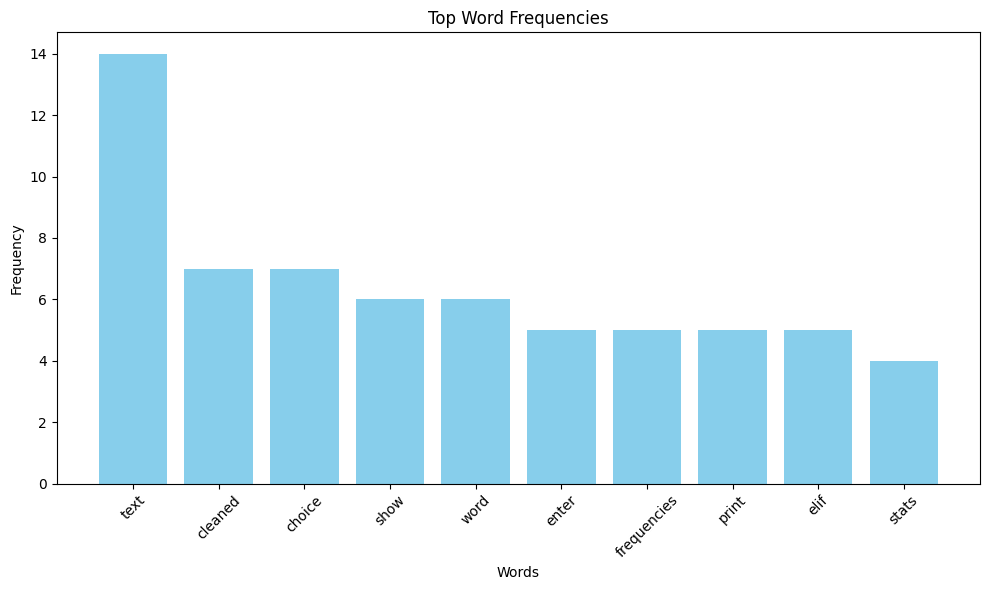


 TEXT ANALYSIS TOOL MENU
Please select one of the following:
1. Enter new text
2. Show cleaned text
3. Show text statistics
4. Show top word frequencies
5. Visualise word frequencies
6. Exit
6
 Exiting program. Goodbye!


In [117]:
main_menu()